<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Lendo-e-Visualizando-os-Dados" data-toc-modified-id="Lendo-e-Visualizando-os-Dados-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Lendo e Visualizando os Dados</a></span></li><li><span><a href="#Regressão-Linear" data-toc-modified-id="Regressão-Linear-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Regressão Linear</a></span></li><li><span><a href="#Curvas-de-Aprendizado" data-toc-modified-id="Curvas-de-Aprendizado-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Curvas de Aprendizado</a></span></li><li><span><a href="#Regressão-Polinomial" data-toc-modified-id="Regressão-Polinomial-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Regressão Polinomial</a></span></li><li><span><a href="#Curva-de-Validação" data-toc-modified-id="Curva-de-Validação-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Curva de Validação</a></span></li></ul></div>

Este notebook tem por objetivo o desenvolvimento das soluções requeridas pelo exercício 5 do curso de Machine Learning.

## Lendo e Visualizando os Dados

In [1]:
% Lendo os dados
load('ex5data1.mat');

% Verificando output
dimensao_X = size(X)
dimensao_y = size(y)
dimensao_Xval = size(Xval)
dimensao_yval = size(yval)

dimensao_X =

   12    1

dimensao_y =

   12    1

dimensao_Xval =

   21    1

dimensao_yval =

   21    1



In [2]:
% A quantidade de dados é baixa, é possível plotar a matriz completa
data_matrix = [X y]

data_matrix =

  -15.9368    2.1343
  -29.1530    1.1733
   36.1895   34.3591
   37.4922   36.8380
  -48.0588    2.8090
   -8.9415    2.1211
   15.3078   14.7103
  -34.7063    2.6142
    1.3892    3.7402
  -44.3838    3.7317
    7.0135    7.6277
   22.7627   22.7524



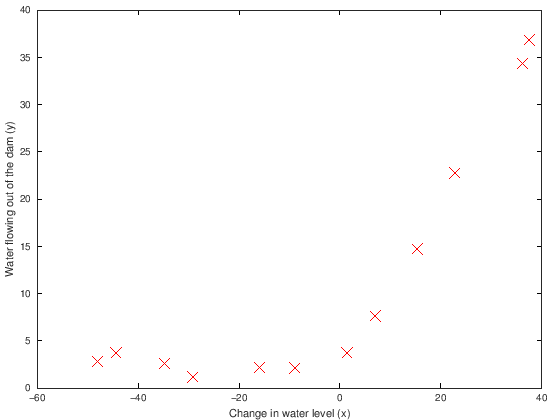

In [3]:
% Vamos plotar os dados para facilitar a visualização
plot(X, y, 'rx', 'MarkerSize', 10, 'LineWidth', 1.5);
xlabel('Change in water level (x)');
ylabel('Water flowing out of the dam (y)');

Muito interessante! O comportamento da quantidade de água que sai da barragem com relação a mudança no nível da água é, de certa forma, exponencial (ou pelo menos de um grau polinomial elevado).

## Regressão Linear

Para verificara os efeitos de ```bias``` e ```variância```, será aplicado um modelo de regressão linear regularizado. Para tal, precisamos calcular a função custo e o gradiente.

In [4]:
% Adicionando termo bias nos dados X
m = size(X, 1);
X_train = [ones(m, 1) X];

% Verificando
X_train(1:5, :)

ans =

    1.0000  -15.9368
    1.0000  -29.1530
    1.0000   36.1895
    1.0000   37.4922
    1.0000  -48.0588



In [5]:
% Inicializando theta
theta = [1; 1]

theta =

   1
   1



In [6]:
% Calculando hypothesis
h_theta = X_train * theta

h_theta =

  -14.9368
  -28.1530
   37.1895
   38.4922
  -47.0588
   -7.9415
   16.3078
  -33.7063
    2.3892
  -43.3838
    8.0135
   23.7627



In [7]:
% Calculando função custo
lambda = 1
J = (1/2*m) * (((h_theta - y).^2) + lambda * sum(theta(2:end).^2))

lambda =  1
J =

    1754.52831
    5166.16867
      54.06832
      22.41890
   14926.78159
     613.52711
      21.31251
    7921.05062
      16.95149
   13325.19443
       6.89325
      12.12449



O retorno da função custo J, acima, está incorreto. Esperamos um único valor de custo para o treinamento.

In [8]:
% Calculando o gradiente
grad = X_train' * (h_theta - y) / m + lambda*[0; theta(2:end)] / m;
grad = grad(:)

grad =

   -15.303
   598.251



Os valores do gradiente indicam que, o primeiro elemento da matriz de parâmetros theta (1), está razoavelmente próximo do valor adequado para este elemento.

O elevado valor obtido no segundo elemento da matriz de gradientes, indicam que o segundo elemento da matriz theta passou longe do valor considerado ideal.

In [9]:
% Criando função para retornar J e grad
function [J, grad] = linearRegCostFunction(X, y, theta, lambda)
    m = length(y);
    J = 0;
    grad = zeros(size(theta));
    
    % Calculando hypothesis
    %X_train = [ones(m, 1) X];
    h_theta = X * theta;
    
    % Calculando função custo J
    J = sum(((h_theta - y).^2) / (2 * m)) + ((lambda * sum(theta(2:end).^2)) / (2 * m));
    
    % Calculando gradiente
    grad = X' * (h_theta - y) / m + lambda*[0; theta(2:end)] / m;
    grad = grad(:);
    
endfunction

In [10]:
J = sum((h_theta - y).^2) / (2 * m) + lambda*sum(theta(2:end).^2) / (2 * m)

J =  303.99


In [11]:
% Chamando função
theta = [1; 1];
lambda = 1;
X_train = [ones(m, 1) X];

[J, grad] = linearRegCostFunction(X_train, y, theta, lambda)

J =  303.99
grad =

   -15.303
   598.251



## Curvas de Aprendizado

Após a implementação da função custo J e dos gradientes referentes a cada um dos parâmetros theta, o próximo passo diz respeito a avaliação de um dos temas presentes neste capítulo: ```curvas de aprendizado```.

Para tal, vamos desenvolver uma função que receba a função custo+gradiente e retorne o melhor set de parâmetros theta. Parece familiar? ```fmincg``` e ```fminunc``` fazem exatamente esse papel.

In [12]:
% Definindo função para treinamento do modelo de Regressão Linear
function [theta] = trainLinearReg(X, y, lambda)
    initial_theta = zeros(size(X, 2), 1);
    costFunction = @(t) linearRegCostFunction(X, y, t, lambda);
    options = optimset('MaxIter', 200, 'GradObj', 'on');
    
    theta = fmincg(costFunction, initial_theta, options);
endfunction

In [13]:
% Chamando função
X_train = [ones(m, 1) X];
[theta] = trainLinearReg([ones(1 , 1) X(1:1 , :)], y(1:1), lambda);

Iteration    10 | Cost: 1.111022e-30


In [14]:
X_train(1:1, :)

ans =

    1.0000  -15.9368



In [15]:
[J, grad] = linearRegCostFunction(X_train(1:5, :), y(1:5), initial_theta, lambda)

error: 'initial_theta' undefined near line 1 column 58


In [16]:
% Verificando parâmetros
theta

theta =

   2.1343e+00
  -1.4907e-15



In [17]:
[J, grad] = linearRegCostFunction(X_train(1:1, :), y(1:1), theta, lambda)

J =    1.1110e-30
grad =

   0.0000e+00
  -1.4907e-15



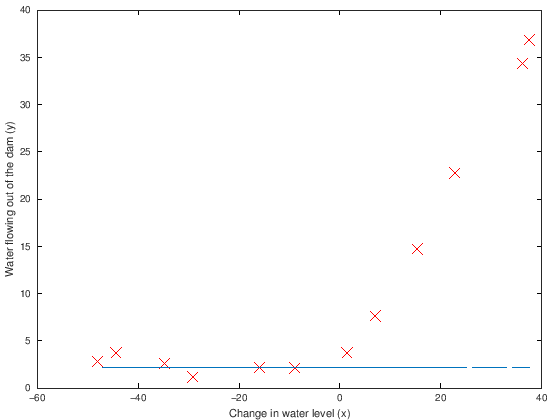

In [18]:
% Plotando curva obtida com regressão linear
plot(X, y, 'rx', 'MarkerSize', 10, 'LineWidth', 1.5);
xlabel('Change in water level (x)');
ylabel('Water flowing out of the dam (y)');
hold on;
plot(X, X_train*theta, '--', 'LineWidth', 2)
hold off;

In [19]:
initial_theta = zeros(size(X_train(1:4, :), 2), 1)

initial_theta =

   0
   0



In [20]:
% Testando preparação para curva de aprendizado
m = size(X, 1);
m_val = size(Xval, 1);
X_train = [ones(m, 1) X];
X_val = [ones(m_val, 1) Xval];
error_train = zeros(m, 1);
error_val = zeros(m, 1);

for i=1:m
    % Calculando erro para dados de treino
    [theta] = trainLinearReg(X_train(1:i, :), y(1:i), 0);
    [J, grad] = linearRegCostFunction(X_train(1:i, :), y(1:i), theta, 0);
    error_train(i) = J;
    % Calculando erro para dados de validação
    [J, grad] = linearRegCostFunction(X_val, yval, theta, lambda);
    error_val(i) = J;
endfor

    fmincg at line 102 column 12
    trainLinearReg at line 6 column 11
    fmincg at line 124 column 8
    trainLinearReg at line 6 column 11
    fmincg at line 124 column 8
    trainLinearReg at line 6 column 11
    fmincg at line 124 column 8
    trainLinearReg at line 6 column 11
    fmincg at line 124 column 8
    trainLinearReg at line 6 column 11
    fmincg at line 124 column 8
    trainLinearReg at line 6 column 11
    fmincg at line 124 column 8
    trainLinearReg at line 6 column 11
    fmincg at line 124 column 8
    trainLinearReg at line 6 column 11
    fmincg at line 124 column 8
    trainLinearReg at line 6 column 11
    fmincg at line 124 column 8
    trainLinearReg at line 6 column 11
    fmincg at line 124 column 8
    trainLinearReg at line 6 column 11
    fmincg at line 124 column 8
    trainLinearReg at line 6 column 11
    fmincg at line 124 column 8
    trainLinearReg at line 6 column 11
    fmincg at line 124 column 8
    trainLinearReg at line 6 column 11
    f

In [21]:
error_train
error_val

error_train =

    0.00000
    0.00000
    3.28660
    2.84268
   13.15405
   19.44396
   20.09852
   18.17286
   22.60941
   23.26146
   24.31725
   22.37391

error_val =

   205.122
   110.300
    45.017
    48.376
    35.870
    33.835
    31.976
    30.867
    31.140
    28.940
    29.555
    29.437



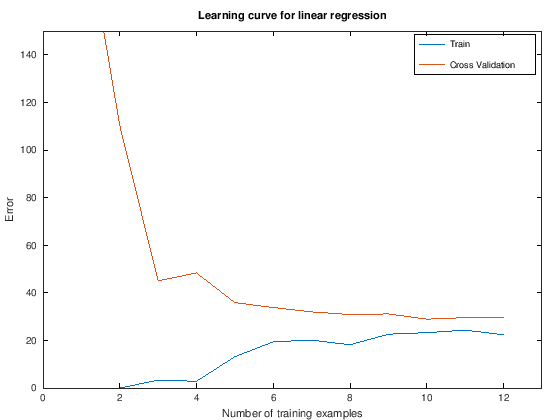

In [23]:
% Plotando curvas de aprendizado para dados de treino e validação

plot(1:m, error_train, 1:m, error_val);
title('Learning curve for linear regression')
legend('Train', 'Cross Validation')
xlabel('Number of training examples')
ylabel('Error')
axis([0 13 0 150])

## Regressão Polinomial

Após verificar que o modelo sofre de um ```bias alto```, vamos aplicar um procedimento para aumentar o grau polinomial do algoritmo, fazendo assim com que este se encaixe melhor nos dados.

In [25]:
% Testando
X
X_train

X =

  -15.9368
  -29.1530
   36.1895
   37.4922
  -48.0588
   -8.9415
   15.3078
  -34.7063
    1.3892
  -44.3838
    7.0135
   22.7627

X_train =

    1.0000  -15.9368
    1.0000  -29.1530
    1.0000   36.1895
    1.0000   37.4922
    1.0000  -48.0588
    1.0000   -8.9415
    1.0000   15.3078
    1.0000  -34.7063
    1.0000    1.3892
    1.0000  -44.3838
    1.0000    7.0135
    1.0000   22.7627



In [26]:
X_poly = zeros(numel(X), 2)

X_poly =

   0   0
   0   0
   0   0
   0   0
   0   0
   0   0
   0   0
   0   0
   0   0
   0   0
   0   0
   0   0



In [28]:
X_2 = X .^ 2;
X_poly(:, 1) = X;
X_poly(:, 2) = X_2;
X_poly

X_poly =

    -15.9368    253.9803
    -29.1530    849.8962
     36.1895   1309.6834
     37.4922   1405.6641
    -48.0588   2309.6511
     -8.9415     79.9497
     15.3078    234.3285
    -34.7063   1204.5249
      1.3892      1.9297
    -44.3838   1969.9181
      7.0135     49.1892
     22.7627    518.1427



In [29]:
% Testando dentro de um laço for
p = 3;
X_poly = zeros(numel(X), p)
for i = 1:p
    X_poly(:, i) = X.^i;
endfor

X_poly

X_poly =

   0   0   0
   0   0   0
   0   0   0
   0   0   0
   0   0   0
   0   0   0
   0   0   0
   0   0   0
   0   0   0
   0   0   0
   0   0   0
   0   0   0

X_poly =

      -15.93676      253.98026    -4047.62197
      -29.15298      849.89620   -24777.00617
       36.18955     1309.68343    47396.85217
       37.49219     1405.66411    52701.42217
      -48.05883     2309.65109  -110999.12775
       -8.94146       79.94967     -714.86661
       15.30779      234.32852     3587.05250
      -34.70627     1204.52489   -41804.56089
        1.38915        1.92975        2.68072
      -44.38376     1969.91814   -87432.37359
        7.01350       49.18921      344.98864
       22.76275      518.14274    11794.35306



Aparentemente, deu tudo certo. Encapsulando dentro de uma função

In [30]:
function[X_poly] = polyFeatures(X, p)
    % Retorna uma matriz onde cada coluna representa os dados de treinamento
    % elevados por um grau polinomial maior, limitado pelo argumento p
    
    % Cria matriz de zeros com "p" colunas
    X_poly = zeros(numel(X), p);
    
    % Popula a matriz criada com os cálculos polinomiais
    for i = 1:p
        X_poly(:, i) = X.^i;
    endfor
    
endfunction

In [31]:
X_poly = polyFeatures(X, 4)

X_poly =

       -15.93676       253.98026     -4047.62197     64505.97238
       -29.15298       849.89620    -24777.00617    722323.54608
        36.18955      1309.68343     47396.85217   1715270.68630
        37.49219      1405.66411     52701.42217   1975891.59278
       -48.05883      2309.65109   -110999.12775   5334488.14992
        -8.94146        79.94967      -714.86661      6391.94974
        15.30779       234.32852      3587.05250     54909.85676
       -34.70627      1204.52489    -41804.56089   1450880.20236
         1.38915         1.92975         2.68072         3.72393
       -44.38376      1969.91814    -87432.37359   3880577.47268
         7.01350        49.18921       344.98864      2419.57852
        22.76275       518.14274     11794.35306    268471.89734



No exercício, o grau polinomial utilizado será 8.

In [44]:
X_poly = polyFeatures(X, 8)

X_poly =

 Columns 1 through 6:

  -1.5937e+01   2.5398e+02  -4.0476e+03   6.4506e+04  -1.0280e+06   1.6383e+07
  -2.9153e+01   8.4990e+02  -2.4777e+04   7.2232e+05  -2.1058e+07   6.1390e+08
   3.6190e+01   1.3097e+03   4.7397e+04   1.7153e+06   6.2075e+07   2.2465e+09
   3.7492e+01   1.4057e+03   5.2701e+04   1.9759e+06   7.4080e+07   2.7774e+09
  -4.8059e+01   2.3097e+03  -1.1100e+05   5.3345e+06  -2.5637e+08   1.2321e+10
  -8.9415e+00   7.9950e+01  -7.1487e+02   6.3919e+03  -5.7153e+04   5.1103e+05
   1.5308e+01   2.3433e+02   3.5871e+03   5.4910e+04   8.4055e+05   1.2867e+07
  -3.4706e+01   1.2045e+03  -4.1805e+04   1.4509e+06  -5.0355e+07   1.7476e+09
   1.3892e+00   1.9297e+00   2.6807e+00   3.7239e+00   5.1731e+00   7.1863e+00
  -4.4384e+01   1.9699e+03  -8.7432e+04   3.8806e+06  -1.7223e+08   7.6444e+09
   7.0135e+00   4.9189e+01   3.4499e+02   2.4196e+03   1.6970e+04   1.1902e+05
   2.2763e+01   5.1814e+02   1.1794e+04   2.6847e+05   6.1112e+06   1.3911e+08

 Columns 7 and 8:


In [45]:
% Normalizando os dados
function [X_norm, mu, sigma] = featureNormalize(X)
%FEATURENORMALIZE Normalizes the features in X 
%   FEATURENORMALIZE(X) returns a normalized version of X where
%   the mean value of each feature is 0 and the standard deviation
%   is 1. This is often a good preprocessing step to do when
%   working with learning algorithms.

mu = mean(X);
X_norm = bsxfun(@minus, X, mu);

sigma = std(X_norm);
X_norm = bsxfun(@rdivide, X_norm, sigma);


% ============================================================

end

In [48]:
% Map X onto Polynomial Features and Normalize
p = 8;
X_poly = polyFeatures(X, p);
[X_poly, mu, sigma] = featureNormalize(X_poly);  % Normalize
X_poly = [ones(m, 1), X_poly];                   % Add Ones

% Map X_poly_test and normalize (using mu and sigma)
X_poly_test = polyFeatures(Xtest, p);
X_poly_test = bsxfun(@minus, X_poly_test, mu);
X_poly_test = bsxfun(@rdivide, X_poly_test, sigma);
X_poly_test = [ones(size(X_poly_test, 1), 1), X_poly_test];         % Add Ones

% Map X_poly_val and normalize (using mu and sigma)
X_poly_val = polyFeatures(Xval, p);
X_poly_val = bsxfun(@minus, X_poly_val, mu);
X_poly_val = bsxfun(@rdivide, X_poly_val, sigma);
X_poly_val = [ones(size(X_poly_val, 1), 1), X_poly_val];           % Add Ones

In [49]:
size(X_poly)
size(X_poly_test)
size(X_poly_val)

ans =

   12    9

ans =

   21    9

ans =

   21    9



## Curva de Validação

Nesta etapa, vamos aplicar diferentes valores para o parâmetro de regularização ```lambda``` e verificar, através dos erros de treino e de validação, qual o comportamento do algoritmo dado o nível de regularização aplicado.

In [32]:
lambda_vec = [0 0.001 0.003 0.01 0.03 0.1 0.3 1 3 10]'

lambda_vec =

    0.00000
    0.00100
    0.00300
    0.01000
    0.03000
    0.10000
    0.30000
    1.00000
    3.00000
   10.00000



In [33]:
% Retornando a quantidade de elementos
length(lambda_vec)

ans =  10


In [39]:
lambda_test = lambda_vec(1:10)

lambda_test =

    0.00000
    0.00100
    0.00300
    0.01000
    0.03000
    0.10000
    0.30000
    1.00000
    3.00000
   10.00000



In [53]:
error_train_test = zeros(m, 1);
error_val_test = zeros(m, 1);

for i = 1:length(lambda_test)
    % Treinando algoritmo com diferentes valores para lambda
    lambda_test(i)
    theta = trainLinearReg(X_poly, y, lambda_test(i))
    [J, grad] = linearRegCostFunction(X_poly, y, theta, lambda_test(i));
    error_train_test(i) = J;
    
    % Calculando erro para dados de validação
    [J, grad] = linearRegCostFunction(X_poly_val, yval, theta, lambda_test(i));
    error_val_test(i) = J;
endfor

ans = 0
Iteration   200 | Cost: 9.253165e-02
theta =

   11.2172
   10.6671
   16.8285
   15.7218
  -21.5940
  -26.3275
   18.1849
   13.1727
   -6.4784

ans =  0.0010000
Iteration   200 | Cost: 1.912170e-01
theta =

   11.2169
   11.7469
   14.6403
   10.1398
  -11.3199
  -13.4429
    5.7428
    2.5809
   -4.3755

ans =  0.0030000
Iteration   200 | Cost: 2.543586e-01
theta =

   11.2176
   11.8559
   13.2700
    8.0185
   -6.6671
   -7.9874
    1.0884
   -1.3952
   -3.5183

ans =  0.010000
Iteration   200 | Cost: 3.850698e-01
theta =

   11.21750
   12.22260
   12.37077
    5.74069
   -4.55728
   -4.90694
   -0.79798
   -2.11371
   -2.40751

ans =  0.030000
Iteration   200 | Cost: 6.692749e-01
theta =

   11.2176
   12.4497
   11.0209
    3.6185
   -2.2778
   -2.3548
   -1.7553
   -1.9808
   -1.6267

ans =  0.10000
Iteration   187 | Cost: 1.443470e+00
theta =

   11.217589
   12.033175
    9.024657
    2.463607
   -0.031106
   -0.751660
   -1.113132
   -0.718906
   -1.250419

ans =  0

In [54]:
error_train_test

error_train_test =

    0.09253
    0.19122
    0.25436
    0.38507
    0.66927
    1.44347
    3.10159
    7.26815
   15.86769
   33.37220
    0.00000
    0.00000



In [55]:
error_val_test

error_val_test =

   10.29413
   17.95810
   19.76163
   17.09071
   13.05014
    8.14939
    5.88245
    7.22746
   10.08939
   19.81979
    0.00000
    0.00000



Parece que, em determinado grau polinomial, os erros são 0.